In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
scaler = StandardScaler()
import pandas_profiling
from datetime import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.metrics import geometric_mean_score as geo
from imblearn.metrics import make_index_balanced_accuracy as iba
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from pycaret.classification import *
import sqlite3
from sqlite3 import Error
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [46]:
df = pd.read_csv('PBL5recommendationdata.csv', encoding = "ISO-8859-1")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [48]:
#pandas_profiling.ProfileReport(df)
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.00,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,52

In [49]:
miss=pd.DataFrame(df.isnull().sum(),index=None)
bos_sutun=miss[miss[0]==4194].index

In [50]:
df.drop(bos_sutun,axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 147 entries, Customers.id to Products.saved_status
dtypes: float64(64), int64(10), object(73)
memory usage: 4.7+ MB


In [52]:
dfc=[col for col in df.columns if 'Customer'in col]

In [53]:
dfcust=df.loc[:,dfc]

In [54]:
for alan in dfcust.columns:
    dfcust.rename(columns={alan:alan[10:]},inplace=True)
dfcust.rename(columns={'id':'customer_id'},inplace=True)

In [55]:
dfcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    4194 non-null   int64  
 1   fname          4194 non-null   object 
 2   lname          4194 non-null   object 
 3   company        727 non-null    object 
 4   create_date    4194 non-null   int64  
 5   status         101 non-null    float64
 6   mailing        2114 non-null   float64
 7   tax_exempt     5 non-null      float64
 8   account_id     3 non-null      float64
 9   last_modified  4194 non-null   int64  
 10  customer_type  3771 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 360.5+ KB


In [56]:
dfp=[col for col in df.columns if 'Products'in col]

In [57]:
dfprod=df.loc[:,dfp]

In [58]:
for alan in dfprod.columns:
    dfprod.rename(columns={alan:alan[9:]},inplace=True)
dfprod.rename(columns={'id':'product_id'},inplace=True)

In [59]:
dfprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             4037 non-null   float64
 1   status                 4037 non-null   float64
 2   template               3973 non-null   object 
 3   vendor                 4037 non-null   float64
 4   import_id              4037 non-null   float64
 5   name                   4037 non-null   object 
 6   display_name           3662 non-null   object 
 7   list_price             4017 non-null   float64
 8   price                  4036 non-null   float64
 9   sale_price             1160 non-null   float64
 10  cost                   4037 non-null   float64
 11  flags                  2987 non-null   float64
 12  left_flag              1239 non-null   float64
 13  last_modified          4037 non-null   float64
 14  taxable                2959 non-null   float64
 15  shop

In [60]:
dfo=[col for col in df.columns if 'Orders'in col]

In [61]:
dford=df.loc[:,dfo]

In [62]:
for alan in dford.columns:
    dford.rename(columns={alan:alan[7:]},inplace=True)
dford.rename(columns={'id':'order_id'},inplace=True)

In [63]:
dford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          4194 non-null   int64  
 1   customer_id       4194 non-null   int64  
 2   fname             4194 non-null   object 
 3   lname             4194 non-null   object 
 4   company           728 non-null    object 
 5   order_number      4194 non-null   object 
 6   reorder_id        82 non-null     float64
 7   external_source   365 non-null    object 
 8   external_id       5 non-null      float64
 9   currency          4194 non-null   object 
 10  subtotal          4194 non-null   float64
 11  tax               3737 non-null   float64
 12  shipping          3999 non-null   float64
 13  coupon_id         882 non-null    float64
 14  coupon_amount     882 non-null    float64
 15  fee_name          227 non-null    object 
 16  fee_amount        278 non-null    float64


In [64]:
conn=sqlite3.connect('customer_seg.db')

In [65]:
dfcust.to_sql('Customers',con=conn)
dfprod.to_sql('Products',con=conn)
dford.to_sql('Orders',con=conn)

ValueError: Table 'Customers' already exists.

In [66]:
conn.execute('SELECT*FROM Customers').fetchall()

[(0,
  797,
  'Christy',
  'Dill',
  'Company0',
  1426018724,
  None,
  None,
  None,
  None,
  1437764306,
  0.0),
 (1,
  3,
  'John',
  'Smith',
  'Company1',
  1386089139,
  None,
  None,
  None,
  None,
  1437764354,
  0.0),
 (2,
  3,
  'John',
  'Smith',
  'Company1',
  1386089139,
  None,
  None,
  None,
  None,
  1437764354,
  0.0),
 (3,
  4,
  'James',
  'Anderson',
  None,
  1386780263,
  None,
  None,
  None,
  None,
  1437762646,
  0.0),
 (4,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (5,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (6,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (7,
  7,
  'peggy ',
  'thompson',
  None,
  1388155947,
  None,
  None,
  None,
  None,
  1437763617,
  0.0),
 (8,
  8,
  'Randy',
  'Pruss',
  None,
  1389303216,
  None,
  None,
  None,
  None,
  1

In [67]:
dfc=pd.read_sql('Select*from Customers',con=conn)
dfp=pd.read_sql('Select*from Products',con=conn)
dfo=pd.read_sql('Select*from Orders',con=conn)

In [68]:
pd.set_option('display.max_columns',None)

In [69]:
dfo['payment_date']=pd.to_datetime(dfo['payment_date'],unit='s')
dfo['placed_date']=pd.to_datetime(dfo['placed_date'],unit='s')
dfo['updated_date']=pd.to_datetime(dfo['updated_date'],unit='s')

In [70]:
dfRFM=dfo.loc[:,['customer_id','order_id','total','placed_date']]

In [71]:
dfRFM.isnull().sum()

customer_id    0
order_id       0
total          0
placed_date    0
dtype: int64

In [72]:
dfRFM.groupby('customer_id')['placed_date'].max()

customer_id
3      2015-12-08 19:40:52
4      2013-12-11 16:44:23
5      2014-09-10 15:40:55
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
               ...        
3730   2016-05-16 14:27:34
3732   2016-05-16 15:32:37
3733   2016-05-16 15:40:46
3735   2016-05-16 16:38:14
3736   2016-05-16 17:01:35
Name: placed_date, Length: 3054, dtype: datetime64[ns]

In [73]:
dfRFM.groupby('customer_id')['placed_date'].min()

customer_id
3      2013-12-03 17:07:35
4      2013-12-11 16:44:23
5      2013-12-12 15:19:59
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
               ...        
3730   2016-05-16 14:27:34
3732   2016-05-16 15:32:37
3733   2016-05-16 15:40:46
3735   2016-05-16 16:38:14
3736   2016-05-16 17:01:35
Name: placed_date, Length: 3054, dtype: datetime64[ns]

In [74]:
dfrfm=dfRFM.groupby('customer_id').agg({'order_id':'count','total':'sum','placed_date':'max'})

In [76]:
today=dt.datetime(2022,7,24)

In [77]:
dfrfm['Recency']=(today - dfrfm['placed_date']).dt.days

In [78]:
dfrfm

,order_id,total,placed_date,Recency
customer_id,,,,
3,2,108.72,2015-12-08 19:40:52,2419
4,1,29.55,2013-12-11 16:44:23,3146
5,3,124.99,2014-09-10 15:40:55,2873
7,1,49.14,2013-12-27 14:52:27,3130
8,1,69.70,2014-01-09 21:33:36,3117
...,...,...,...,...
3730,1,16.06,2016-05-16 14:27:34,2259
3732,1,39.99,2016-05-16 15:32:37,2259
3733,1,989.10,2016-05-16 15:40:46,2259


In [79]:
dfrfm.columns=['frequency','monetary','date','recency']

In [80]:
dfrfm.drop('date',axis=1,inplace=True)

In [81]:
model=KMeans(n_clusters=4)

In [82]:
model=model.fit(dfrfm)

In [83]:
pred=model.predict(dfrfm)

In [84]:
dfrfm['cluster']=pred

In [85]:
dfrfm

,frequency,monetary,recency,cluster
customer_id,,,,
3,2,108.72,2419,2
4,1,29.55,3146,0
5,3,124.99,2873,0
7,1,49.14,3130,0
8,1,69.70,3117,0
...,...,...,...,...
3730,1,16.06,2259,2
3732,1,39.99,2259,2
3733,1,989.10,2259,2


In [86]:
silhouette_score(dfrfm,pred)

0.5228442670637237

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


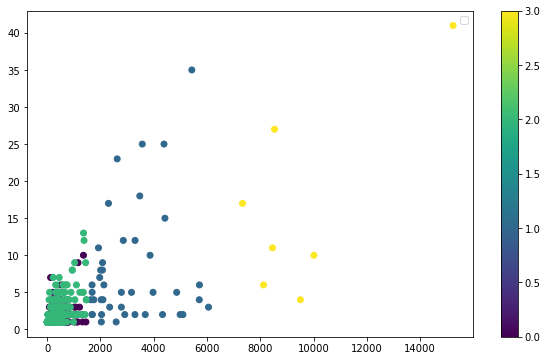

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(dfrfm.monetary,dfrfm.frequency,c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [96]:
allscore=[]
allclusters=[]
sum_of_squared_distance=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(dfrfm)
        pred=model.predict(dfrfm) 
        score=silhouette_score(dfrfm,pred)
        allscore.append(score)
        allclusters.append(no_of_cluster)
        sum_of_squared_distance.append(model.inertia_)
        print('number of cluster {}, silhouette {}'.format(no_of_cluster,score))
        
clust(10)

number of cluster 2, silhouette 0.9354774451816458
number of cluster 3, silhouette 0.893572342343989
number of cluster 4, silhouette 0.5244416391685761
number of cluster 5, silhouette 0.5573032449593505
number of cluster 6, silhouette 0.557327206384781
number of cluster 7, silhouette 0.5683410064560459
number of cluster 8, silhouette 0.5021646108086161
number of cluster 9, silhouette 0.5120381649681959
number of cluster 10, silhouette 0.5088888212449529


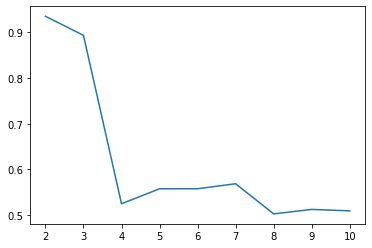

In [97]:
plt.plot(allclusters,allscore)

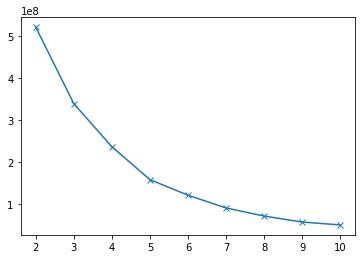

In [98]:
plt.plot(allclusters,sum_of_squared_distance,marker='x')